# Analise de produções de filmes que foram feitos por diretores anualmente

## Objetivo:

### Quantos  filmes foram exibidos durantes o ano de 2002 ate o comeco de 2019;
### Quais são os diretores que mais fizeram filmes durante os anos de 2002 ate 2019.

## Origem dos dados:

### Foi retirado do site, dados.gov.br


In [71]:
import pandas as pd 
import seaborn as sb #biblioteca de view
low_memory=False
%matplotlib inline #diz que o grafico vai ser em linha
pd.options.display.max_columns = 80 #coloca * caso passe de 80
pd.options.display.max_rows = 90#coloca * caso passe de 80

UsageError: unrecognized arguments: #diz que o grafico vai ser em linha


In [72]:
file= 'Tabela_Obras_Cinema.csv'
op = pd.read_csv(file,sep=';', engine='python')

In [73]:
op.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8734 entries, 0 to 8733
Data columns (total 8 columns):
Codigo da obra                  8734 non-null int64
Titulo Original                 8734 non-null object
Titulo no Brasil                8734 non-null object
Ano de produc?o                 8731 non-null float64
Diretor                         8734 non-null object
Raz?o Social do Requerente      8734 non-null object
CNPJ Requerente                 8734 non-null object
Data de liberac?o p exibic?o    8734 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 546.0+ KB


In [74]:
op.rename(columns={"Codigo da obra":"CodigoDaObra",
                   "Titulo Original":"TituloOriginal",
                   "Titulo no Brasil":"TituloNoBrasil",
                   "Ano de produc?o":"AnoProdução",
                   "Raz?o Social do Requerente":"RazãoSocialRequerente",
                   "CNPJ Requerente":"CNPJ_Requerente",
                   "Data de liberac?o p exibic?o":"DataExibiçãoFilme"}, inplace=True)

In [75]:
op.head(20) #mostra os 20 primeiros 

,CodigoDaObra,TituloOriginal,TituloNoBrasil,AnoProdução,Diretor,RazãoSocialRequerente,CNPJ_Requerente,DataExibiçãoFilme
0,15639,"PRE€O DA PAZ, O","PRE€O DA PAZ, O",2003.0,PAULO DE TARSO DE CARVALHO MORELLI,M A PRODU€åES ARTISTICAS E CULTURAIS LTDA ME,00.568.159/0001-07,06/jul/12
1,7603,"CARTOMANTE,A","CARTOMANTE,A",2002.0,WAGNER DE ASSIS E PABLO URANGA,TAG CULTURAL DISTRIBUIDORA DE FILMES LTDA,03.599.148/0001-82,13/jul/04
2,28836,SHOW DE BOLA,SHOW DE BOLA,2006.0,M. MAX,FALLMS DISTRIBUI€ÇO DE FITAS LTDA,02.341.697/0001-90,13/mar/07
3,17284,THE GURU,O GURU DO SEXO,2002.0,DAISY MAYER,PARAMOUNT PICTURES BRASIL DISTRIBUIDORA DE FIL...,27.654.722/0001-16,16-DEC-02
4,4806,QUIET AMERICAN,O AMERICANO TRANQUILO,2002.0,PHILLIP NOYCE,COLUMBIA TRISTAR FILMES DO BRASIL LTDA,00.979.601/0001-98,15/jan/03
5,7196,BOAT TRIP,CRUZEIRO DAS LOUCAS,2002.0,MORT NATHAN,IMAGEM FILMES PRODUTORA LTDA,02.736.672/0001-95,13-MAY-03
6,1643,THE GATHERING,O ENCONTRO,2002.0,BRIAN GILBERT,MOVIE STAR DO BRASIL ENTRETENIMENTO E LAZER LTDA.,04.658.426/0001-98,22-AUG-03
7,4825,SPANGLISH,ESPANGLES,2004.0,JAMES L. BROOKS,COLUMBIA TRISTAR FILMES DO BRASIL LTDA,00.979.601/0001-98,15/mar/04
8,7621,NOBODY KNOWS,NINGU�M PODE SABER,2004.0,HIROKAZU KORE-EDA,TAG CULTURAL DISTRIBUIDORA DE FILMES LTDA,03.599.148/0001-82,25/nov/04
9,5787,HISTàRIAS MÖNIMAS,HISTàRIAS MÖNIMAS,2002.0,CARLOS SORIN,CENTRO DE CULTURA CINEMATOGRµFICA PROVIDENCE,01.368.016/0001-14,20-DEC-05


In [76]:
op["DataExibiçãoFilme"]=pd.to_datetime(op['DataExibiçãoFilme']) #Formata as String para datas

In [77]:
op["AnoExibiçãoFilme"]= op["DataExibiçãoFilme"].dt.strftime('%Y') #Cria uma coluna somente com o ano de exibição
op["DataExibiçãoFilme"]= op["DataExibiçãoFilme"].dt.strftime('%d/%m/%Y')#formata a data para ser mais legivel

In [78]:
op.head(20) #mostras os 20 primeiros dados com as mudancas anterios

,CodigoDaObra,TituloOriginal,TituloNoBrasil,AnoProdução,Diretor,RazãoSocialRequerente,CNPJ_Requerente,DataExibiçãoFilme,AnoExibiçãoFilme
0,15639,"PRE€O DA PAZ, O","PRE€O DA PAZ, O",2003.0,PAULO DE TARSO DE CARVALHO MORELLI,M A PRODU€åES ARTISTICAS E CULTURAIS LTDA ME,00.568.159/0001-07,06/07/2012,2012
1,7603,"CARTOMANTE,A","CARTOMANTE,A",2002.0,WAGNER DE ASSIS E PABLO URANGA,TAG CULTURAL DISTRIBUIDORA DE FILMES LTDA,03.599.148/0001-82,13/07/2004,2004
2,28836,SHOW DE BOLA,SHOW DE BOLA,2006.0,M. MAX,FALLMS DISTRIBUI€ÇO DE FITAS LTDA,02.341.697/0001-90,13/03/2007,2007
3,17284,THE GURU,O GURU DO SEXO,2002.0,DAISY MAYER,PARAMOUNT PICTURES BRASIL DISTRIBUIDORA DE FIL...,27.654.722/0001-16,16/12/2002,2002
4,4806,QUIET AMERICAN,O AMERICANO TRANQUILO,2002.0,PHILLIP NOYCE,COLUMBIA TRISTAR FILMES DO BRASIL LTDA,00.979.601/0001-98,15/01/2003,2003
5,7196,BOAT TRIP,CRUZEIRO DAS LOUCAS,2002.0,MORT NATHAN,IMAGEM FILMES PRODUTORA LTDA,02.736.672/0001-95,13/05/2003,2003
6,1643,THE GATHERING,O ENCONTRO,2002.0,BRIAN GILBERT,MOVIE STAR DO BRASIL ENTRETENIMENTO E LAZER LTDA.,04.658.426/0001-98,22/08/2003,2003
7,4825,SPANGLISH,ESPANGLES,2004.0,JAMES L. BROOKS,COLUMBIA TRISTAR FILMES DO BRASIL LTDA,00.979.601/0001-98,15/03/2004,2004
8,7621,NOBODY KNOWS,NINGU�M PODE SABER,2004.0,HIROKAZU KORE-EDA,TAG CULTURAL DISTRIBUIDORA DE FILMES LTDA,03.599.148/0001-82,25/11/2004,2004
9,5787,HISTàRIAS MÖNIMAS,HISTàRIAS MÖNIMAS,2002.0,CARLOS SORIN,CENTRO DE CULTURA CINEMATOGRµFICA PROVIDENCE,01.368.016/0001-14,20/12/2005,2005


# ---------------------------------------------------------------------------------------------------------------
## Primeira analise que mostrar, quais quantidade de filmes exibidos no periodo de 2002 ate 2019

<bound method Axes.hist of <matplotlib.axes._subplots.AxesSubplot object at 0x000000DF89F5D7B8>>

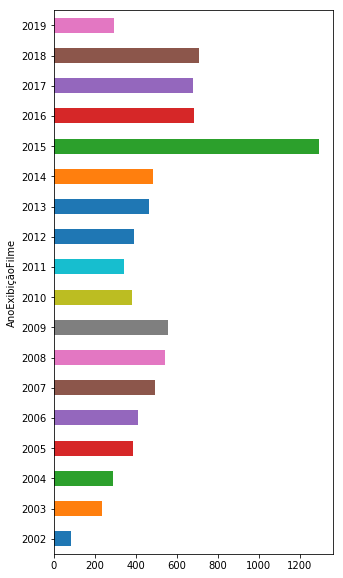

In [79]:
op.groupby('AnoExibiçãoFilme').size().plot(kind='barh', figsize=(5,10)).hist

### O grafico acima mostra a quantidade de filmes que cada ano teve, ele informa o que ano de  2015 teve mais filmes exibidos do que os outros anos.

In [80]:
op.groupby('AnoExibiçãoFilme').size()

AnoExibiçãoFilme
2002      87
2003     234
2004     289
2005     385
2006     412
2007     496
2008     543
2009     556
2010     383
2011     344
2012     390
2013     467
2014     486
2015    1295
2016     684
2017     680
2018     708
2019     295
dtype: int64

### Os dados acima confirma que a quantidade de filmes mostrada no grafico acima dentro de cada ano e o ano que teve mais filmes exibidos

In [81]:
op.query('AnoExibiçãoFilme == "2015"')

,CodigoDaObra,TituloOriginal,TituloNoBrasil,AnoProdução,Diretor,RazãoSocialRequerente,CNPJ_Requerente,DataExibiçãoFilme,AnoExibiçãoFilme
35,473802,QUEBRADEIRAS,QUEBRADEIRAS,2009.0,EVALDO SERGIO VINAGRE MOCARZEL,RAIZ DISTRIBUIDORA AUDIOVISUAL LTDA.,08.331.280/0001-22,03/06/2015,2015
36,504273,"APARECIDA, O MILAGRE","APARECIDA, O MILAGRE",2010.0,TIZUKA YAMASAKI,PARAMOUNT PICTURES BRASIL DISTRIBUIDORA DE FIL...,27.654.722/0001-16,03/06/2015,2015
83,717988,CIDADE CINZA,CIDADE CINZA,2013.0,GUILHERME VALIENGO,SALA 12 PRODU€åES ARTÖSTICAS LTDA,09.640.643/0001-74,03/06/2015,2015
87,726926,HERAN€AS,HERAN€AS,2013.0,MAICON ROBERTO DEWES,CAMINHOS DA SERRA PRODU€åES LTDA,09.343.259/0001-00,03/06/2015,2015
125,432566,DIA DE JOGO,DIA DE JOGO,2009.0,LÖGIA WALPER,WALPER RUAS PRODU€åES LTDA,05.456.798/0001-02,07/08/2015,2015
127,447869,400 CONTRA 1,400 CONTRA 1,2010.0,LUIZ CARLOS PEREIRA DE SOUZA,PLAYARTE PICTURES ENTRETENIMENTOS LTDA.,00.943.231/0001-39,03/06/2015,2015
134,631888,NA ESTRADA - ON THE ROAD,NA ESTRADA - ON THE ROAD,2012.0,WALTER SALLES JéNIOR,PLAYARTE PICTURES ENTRETENIMENTOS LTDA.,00.943.231/0001-39,03/06/2015,2015
194,547716,OS MONSTROS,OS MONSTROS,2011.0,PEDRO DIàGENES PARENTE COELHO,VITRINE FILMES EIRELI - ME,11.620.976/0001-83,03/06/2015,2015
196,604174,SOBRE FUTEBOL E BARREIRAS,SOBRE FUTEBOL E BARREIRAS,2010.0,LUCAS EMANUEL DE ALENCAR JUSTINIANO,OL� PRODU€åES LTDA,09.019.897/0001-70,02/06/2015,2015
202,710196,OZUALDO CANDEIAS E O CINEMA,OZUALDO CANDEIAS E O CINEMA,2013.0,LUIS CLAUDIO BUONACURA,HECO PRODU€åES LTDA,00.205.194/0001-61,03/06/2015,2015


### Nesta tabela mostra os filmes que exibidos durante o ano de 2015, e no final mostra a quantidade de linhas, que indica que cada linha representa um filme.
### Sendo assim a quandiade de filmes que foram exibidos foram 1295 filmes.

# ---------------------------------------------------------------------------------------------------------------
## Segundo analise que mostrar, quais são os dez diretores que mais fizeram filmes durante o periodo de 2002 ate 2019

#### Mostrar os dez diretores que fizeram mais filmes durantes os anos de 2002 ate 2019

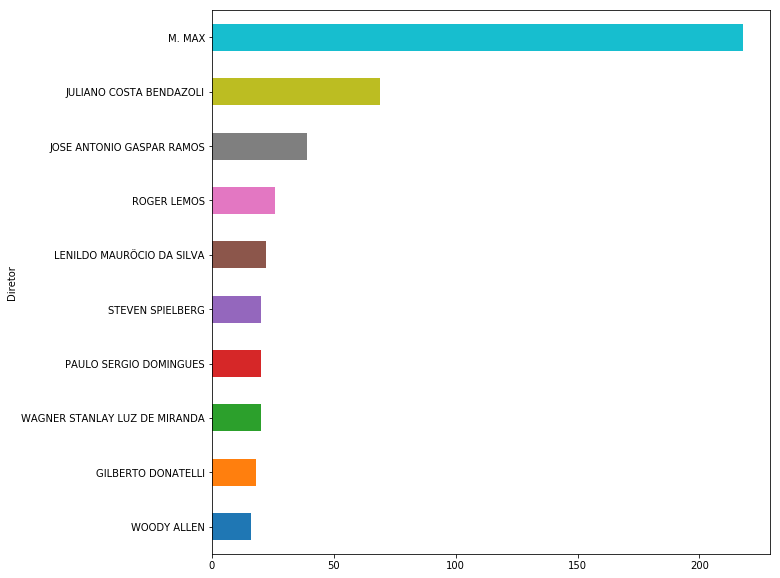

In [82]:
op.groupby('Diretor').size().sort_values().tail(10).plot(kind='barh', figsize=(10,10))

In [83]:
op.query('Diretor=="STEVEN SPIELBERG"').sort_index().count()

CodigoDaObra             20
TituloOriginal           20
TituloNoBrasil           20
AnoProdução              20
Diretor                  20
RazãoSocialRequerente    20
CNPJ_Requerente          20
DataExibiçãoFilme        20
AnoExibiçãoFilme         20
dtype: int64

### No grafico acima mostra que dez diretores que fizeram mais filmes, e ao analizar indica que os diretores mais renomareis e que fizeream mais filmes no cinema não esta em uma grande colocação como Steven Spielberg

### Agora irei verificar o que o calocado que fez mais filmes.

In [84]:
op.query('Diretor=="M. MAX"').sort_index()

,CodigoDaObra,TituloOriginal,TituloNoBrasil,AnoProdução,Diretor,RazãoSocialRequerente,CNPJ_Requerente,DataExibiçãoFilme,AnoExibiçãoFilme
2,28836,SHOW DE BOLA,SHOW DE BOLA,2006.0,M. MAX,FALLMS DISTRIBUI€ÇO DE FITAS LTDA,02.341.697/0001-90,13/03/2007,2007
17,164406,SURFISTINHAS,SURFISTINHAS,2006.0,M. MAX,FALLMS DISTRIBUI€ÇO DE FITAS LTDA,02.341.697/0001-90,14/03/2007,2007
20,214761,FàRUM 2006,FàRUM 2006,2006.0,M. MAX,FALLMS ENTRETENIMENTO DISTRIBUIDORA DE FILMES ...,06.987.687/0001-87,21/09/2007,2007
21,214761,FàRUM 2006,FàRUM 2006,2006.0,M. MAX,FALLMS ENTRETENIMENTO DISTRIBUIDORA DE FILMES ...,06.987.687/0001-87,19/06/2009,2009
31,351251,BABY FACE,BABY FACE,2004.0,M. MAX,FALLMS ENTRETENIMENTO DISTRIBUIDORA DE FILMES ...,06.987.687/0001-87,31/03/2009,2009
32,349701,PAGODE SEXUAL,PAGODE SEXUAL,2008.0,M. MAX,FALLMS ENTRETENIMENTO DISTRIBUIDORA DE FILMES ...,06.987.687/0001-87,31/03/2009,2009
66,214759,O MELHOR DO ANAL TOTAL,O MELHOR DO ANAL TOTAL,2007.0,M. MAX,FALLMS ENTRETENIMENTO DISTRIBUIDORA DE FILMES ...,06.987.687/0001-87,21/09/2007,2007
67,271976,PEITUDAS & CIA. VOLUME 2,PEITUDAS & CIA. VOLUME 2,2005.0,M. MAX,FALLMS ENTRETENIMENTO DISTRIBUIDORA DE FILMES ...,06.987.687/0001-87,26/05/2008,2008
68,271872,VIOLA€ÇO ANAL VOLUME 3,VIOLA€ÇO ANAL VOLUME 3,2005.0,M. MAX,FALLMS ENTRETENIMENTO DISTRIBUIDORA DE FILMES ...,06.987.687/0001-87,26/05/2008,2008
137,26663,ELAS GOSTAM ATRµS VOL. 2,ELAS GOSTAM ATRµS VOL. 2,2006.0,M. MAX,FALLMS DISTRIBUI€ÇO DE FITAS LTDA,02.341.697/0001-90,19/01/2007,2007


In [85]:
op.query('Diretor=="M. MAX"').count()

CodigoDaObra             218
TituloOriginal           218
TituloNoBrasil           218
AnoProdução              218
Diretor                  218
RazãoSocialRequerente    218
CNPJ_Requerente          218
DataExibiçãoFilme        218
AnoExibiçãoFilme         218
dtype: int64

### Mostra que o M. MAX fez todos os filmes de  uma certa catecoria e mostra tambem que alguns filmes forma exibidos em outros anos, assim criando duplicidade dos dados da produção do filmes. Tambem indica supostamente que exista dados duplicatos em outra diretores.

### Verificando que existe outros dados duplicados

In [86]:
op.duplicated("TituloOriginal")

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21       True
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
8704    False
8705    False
8706    False
8707     True
8708    False
8709    False
8710     True
8711    False
8712    False
8713    False
8714     True
8715    False
8716    False
8717     True
8718     True
8719     True
8720     True
8721    False
8722     True
8723    False
8724     True
8725    False
8726    False
8727    False
8728    False
8729     True
8730    False
8731    False
8732    False
8733     True
Length: 8734, dtype: bool

### Indica que a suposição de duplicidade de outros diretores é real

In [87]:
op=op.drop_duplicates("TituloOriginal")

#### Retirados dados duplicados

In [88]:
op.query('Diretor=="M. MAX"').sort_index()

,CodigoDaObra,TituloOriginal,TituloNoBrasil,AnoProdução,Diretor,RazãoSocialRequerente,CNPJ_Requerente,DataExibiçãoFilme,AnoExibiçãoFilme
2,28836,SHOW DE BOLA,SHOW DE BOLA,2006.0,M. MAX,FALLMS DISTRIBUI€ÇO DE FITAS LTDA,02.341.697/0001-90,13/03/2007,2007
17,164406,SURFISTINHAS,SURFISTINHAS,2006.0,M. MAX,FALLMS DISTRIBUI€ÇO DE FITAS LTDA,02.341.697/0001-90,14/03/2007,2007
20,214761,FàRUM 2006,FàRUM 2006,2006.0,M. MAX,FALLMS ENTRETENIMENTO DISTRIBUIDORA DE FILMES ...,06.987.687/0001-87,21/09/2007,2007
31,351251,BABY FACE,BABY FACE,2004.0,M. MAX,FALLMS ENTRETENIMENTO DISTRIBUIDORA DE FILMES ...,06.987.687/0001-87,31/03/2009,2009
32,349701,PAGODE SEXUAL,PAGODE SEXUAL,2008.0,M. MAX,FALLMS ENTRETENIMENTO DISTRIBUIDORA DE FILMES ...,06.987.687/0001-87,31/03/2009,2009
66,214759,O MELHOR DO ANAL TOTAL,O MELHOR DO ANAL TOTAL,2007.0,M. MAX,FALLMS ENTRETENIMENTO DISTRIBUIDORA DE FILMES ...,06.987.687/0001-87,21/09/2007,2007
67,271976,PEITUDAS & CIA. VOLUME 2,PEITUDAS & CIA. VOLUME 2,2005.0,M. MAX,FALLMS ENTRETENIMENTO DISTRIBUIDORA DE FILMES ...,06.987.687/0001-87,26/05/2008,2008
68,271872,VIOLA€ÇO ANAL VOLUME 3,VIOLA€ÇO ANAL VOLUME 3,2005.0,M. MAX,FALLMS ENTRETENIMENTO DISTRIBUIDORA DE FILMES ...,06.987.687/0001-87,26/05/2008,2008
137,26663,ELAS GOSTAM ATRµS VOL. 2,ELAS GOSTAM ATRµS VOL. 2,2006.0,M. MAX,FALLMS DISTRIBUI€ÇO DE FITAS LTDA,02.341.697/0001-90,19/01/2007,2007
175,219034,ANAL TOTAL VOLUME 11,ANAL TOTAL VOLUME 11,2005.0,M. MAX,FALLMS ENTRETENIMENTO DISTRIBUIDORA DE FILMES ...,06.987.687/0001-87,03/06/2009,2009


In [89]:
op.query('Diretor=="M. MAX"').sort_index().count()

CodigoDaObra             204
TituloOriginal           204
TituloNoBrasil           204
AnoProdução              204
Diretor                  204
RazãoSocialRequerente    204
CNPJ_Requerente          204
DataExibiçãoFilme        204
AnoExibiçãoFilme         204
dtype: int64

### Esta Nova pesquisa indica que mesmos apos a retiradas dos dados duplicados, indica que a quantidade de filmes que diminuiu foi pouco de 218 a 204.

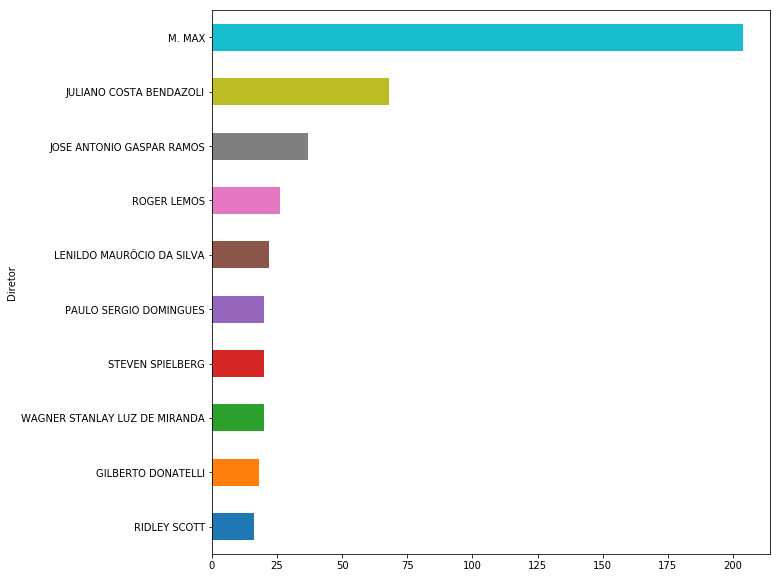

In [90]:
op.groupby('Diretor').size().sort_values().tail(10).plot(kind='barh', figsize=(10,10))

In [69]:
op.query('Diretor=="STEVEN SPIELBERG"').sort_index().count()

CodigoDaObra             20
TituloOriginal           20
TituloNoBrasil           20
AnoProdução              20
Diretor                  20
RazãoSocialRequerente    20
CNPJ_Requerente          20
DataExibiçãoFilme        20
AnoExibiçãoFilme         20
dtype: int64

## Ao concluir mostra que as informações  são verdadeiras e indica que M. MAX fez mais filmes no total, durantes este periodo de 2002 ate 2019.

# ---------------------------------------------------------------------------------------------------------------